In [2]:
import pickle
import numpy as np

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Setup Data
from utils.data import fires, FEATURE_NAMES
from utils.visualization import plot_decisions

%matplotlib inline

In [3]:
X, y_log = fires[FEATURE_NAMES], fires["log(area+1)"]

## Parameter Tuning

In [4]:
epsilon_range = np.linspace(0.1, 10, num=100)
gamma_range = np.linspace(0.1, 10, num=10)


In [7]:
svm_model = GridSearchCV(SVR(), param_grid={
    "epsilon": epsilon_range,
    "gamma": gamma_range,
}, cv=5)

In [8]:
svm_model.fit(X, y_log)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'epsilon': array([ 0.1,  0.2, ...,  9.9, 10. ]), 'gamma': array([ 0.1,  1.2,  2.3,  3.4,  4.5,  5.6,  6.7,  7.8,  8.9, 10. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

## Visualize Decisions

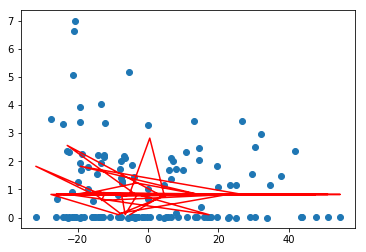

In [10]:
plot_decisions(svm_model.best_estimator_, X, y_log)

## Saving the model

In [11]:
with open("svm.b", "wb") as f:
    pickle.dump(svm_model.best_estimator_, f)